## Random Number Generation

Random numbers are crucial for modeling physical systems that include an element of chance and are central to Monte Carlo simulation calculations involving naturally random processes like collisional motion, radioactive decay, variations in initial conditions, etc.

These ideas are closely associated with probability and statistics, and probability distributions.  We can define the basic probability density function, f(x), via f(x)dx being the probability of x having a value from x to x+dx. 

The cumulative probability function, F(x), is the integral of f(x) and represents the probability that x is less than or equal to some value x$_0$ as defined by -
$$F(x) = \int_{-\infty}^{x_0} f(x) dx$$

The basic random number library to use comes from the Numpy.Random library.  We will most often use the uniform random number generator - numpy.random.rand().  There are options for rand() that will create a large number of random numbers at one time, shaped as requested in an array (see random walk example below).

The uniform random number probability density is $f(x) = 1$ for 0<x<1 and $$F(x) = \int_{0}^{x} f(x') dx' = x$$

Other useful functions include (see manual for arguments):
* numpy.random.binomial()  chooses from a binomial distribution
* numpy.random.randn() chooses from a standard normal (Gaussian) distribution
* numpy.random.normal() choose from a normal distribution using set mean and standard deviation
* numpy.random.poisson() chooses from a Poisson distribution

9.4868329805051381

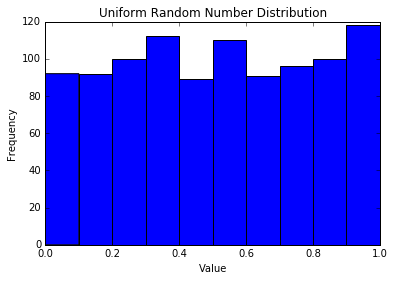

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

myrands=np.random.rand(1000)   #create an array of uniform random numbers
unihist=np.histogram(myrands)   #useful numpy function for creating histograms (bins)

plt.hist(myrands)
plt.title("Uniform Random Number Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

#binary distribution std dev is n*p*(1-p)
np.sqrt(1000.*0.1*0.9)

In [30]:
unihist

(array([ 92,  92, 100, 112,  89, 110,  91,  96, 100, 118]),
 array([  3.87703303e-04,   1.00261298e-01,   2.00134893e-01,
          3.00008487e-01,   3.99882082e-01,   4.99755676e-01,
          5.99629271e-01,   6.99502866e-01,   7.99376460e-01,
          8.99250055e-01,   9.99123650e-01]))

In [33]:
type(unihist)  #shows that unihist is a tuple - ordered list of variables

tuple

In [36]:
unihist[0]  #first tuple element is the array of binned values, second the edges of the bins

array([ 92,  92, 100, 112,  89, 110,  91,  96, 100, 118])

The last line in the script above is a crude way to estimate the variations in the numbers generated, and see if it is as expected.   Modern random number generators are very reliable, but there are statistical tests one can do to check their validity.

For instance, for a uniform random number, we can look at what is called the moments of x, which are the average values of some power of x - 
$$<x^k> \approx \frac{1}{N} \sum_{i=1}^{N} {x}_i^k  = \int_{0}^{1} x^k f(x) dx = \frac{1}{k+1}$$

If this holds for various k values, the distribution is uniform since the assumed f(x) is uniform.

Further, if the numbers are uniform and independent of each other, then the following holds for the joint distribution of sequential values -
$$\frac{1}{N} \sum_{i=1}^{N} x_i x_{i+k} \approx \int_{0}^{1}dx \int_{0}^{1}xy f(x,y)dy = \frac{1}{4}$$
This relies on f(x,y)=f(x)f(y) also being a constant, independent of x and y and no correlation between x and y.


In [39]:
plt.bar(height=unihist[0])

TypeError: bar() missing 1 required positional argument: 'left'

## Random Walks

A common problem in physics involves particles that can move in a medium before eventually colliding and changing direction.  This is the basic idea behind a $\textbf{Random Walk}$.  This could be appropriate in a wide variety of systems, from cream spreading out in coffee to photons making their way out from the interior of a star.  

Random walks can be controlled in many ways, assuming uniform or randomly sized steps, in any number of dimensions.

The code below the results of a 2D random walk, of uniform step length 1, for a number of walkers -

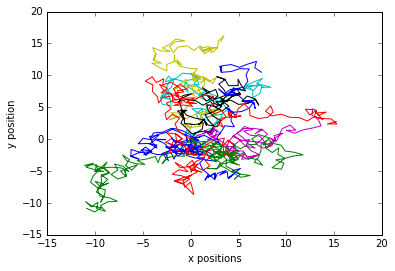

In [13]:
######################################## Solution of random walk problem
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt

nwalkers=10
nsteps=100

steparr=nprand.rand(10,100,2)-0.5  #go ahead and get all nwalk*nstep*ndim rands
xsteps=np.zeros((10,100))   #cumulative x positions
ysteps=np.zeros((10,100)) #cumulative y positions

for i in range(nwalkers):          #loop over walkers
    for j in range(1,nsteps):        #loop over steps all start at 0,0
      r=np.sqrt(steparr[i,j,0]**2 + steparr[i,j,1]**2) #normalize step size to 1
      xsteps[i,j]=xsteps[i,j-1] + steparr[i,j,0]/r
      ysteps[i,j]=ysteps[i,j-1] + steparr[i,j,1]/r

for k in range(nwalkers):
    plt.plot(xsteps[k,:],ysteps[k,:])
    
plt.xlabel('x positions');
plt.ylabel('y position');
plt.show()

How far will the average walker travel?   Imagine that every step is defined by a randomly oriented vector $\vec{l}_i$.  What is the average distance traveled?   It must simply be - 
$$<r>= <\sum_{i=1}^{N}\vec{l}_i>=\sum_{i=1}^{N}<\vec{l}_i>=0$$
On average, the walker does not move!   In reality, it is more accurate to look at the average distance squared as an estimate of net motion-
$$<r^2>= <(\sum_{i=1}^{N}\vec{l}_i)(\sum_{j=1}^{N}\vec{l}_j)>=\sum_{i=1}^{N}<{\vec{l}_i}^2> +\sum_{i=1}^{N}\sum_{j\ne i}^{}<{\vec{l}_i}.{\vec{l}_i}>= Nl^{2}$$
And then the root-mean-squared distance is -
$$\sqrt{<r^2>}=\sqrt{N} l$$
Thus the average distance moved will go as the square root of the number of steps.

